<a href="https://colab.research.google.com/github/Leksandretta/inno_arch/blob/main/ml_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загрузка дата сета из Открытых данных Правительства Москвы
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Чтение первых пяти строк
path = ('/content/data.csv')
df = pd.read_csv(path, sep=";")
df.head(5)


,global_id,status,Contract,completed,notСompleted,Name,INN,SubjectOfSmallBusiness,government
0,2612803258,1,55,55,0,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ МЕЖДУ...,7727591609,1,0
1,2612803260,0,7,3,4,Общество с ограниченной ответственностью КВЕСТ,7720426250,0,0
2,2612803262,0,5,2,3,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ КОРПО...,5053046400,1,0
3,2612803263,0,1,0,1,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ МЕДКО...,1657136391,1,0
4,2612803264,0,1,0,1,Общество с ограниченной ответственностью КБК С...,7709911486,0,0


In [ ]:
#Общая информация по данным
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   global_id               1050 non-null   int64 
 1   status                  1050 non-null   int64 
 2   Contract                1050 non-null   int64 
 3   completed               1050 non-null   int64 
 4   notСompleted            1050 non-null   int64 
 5   Name                    1050 non-null   object
 6   INN                     1050 non-null   int64 
 7   SubjectOfSmallBusiness  1050 non-null   int64 
 8   government              1050 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 74.0+ KB


In [ ]:
# Статистика по всем данным
df.describe(include='all')

,global_id,status,Contract,completed,notСompleted,Name,INN,SubjectOfSmallBusiness,government
count,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1050,1.050000e+03,1050.000000,1050.000000
unique,NaN,NaN,NaN,NaN,NaN,1047,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ГОРИЗОНТ,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
mean,2.612804e+09,0.929524,34.107619,33.376190,0.721905,NaN,7.713461e+09,0.722857,0.010476
std,5.906446e+02,0.256070,20.584473,20.163829,1.376223,NaN,1.760892e+10,0.447801,0.101864
min,2.612803e+09,0.000000,1.000000,0.000000,0.000000,NaN,2.640657e+08,0.000000,0.000000
25%,2.612804e+09,1.000000,16.000000,16.000000,0.000000,NaN,7.604765e+09,0.000000,0.000000
50%,2.612804e+09,1.000000,34.000000,34.000000,0.000000,NaN,7.718775e+09,1.000000,0.000000
75%,2.612805e+09,1.000000,52.000000,52.000000,1.000000,NaN,7.729491e+09,1.000000,0.000000


<Axes: xlabel='SubjectOfSmallBusiness', ylabel='count'>

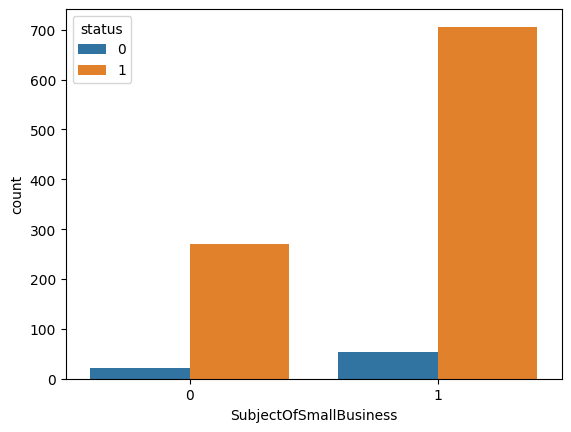

In [ ]:
# Какие предприятия чаще оказываются ненадежными? Результат: субъекты МСП
sns.countplot(x = 'SubjectOfSmallBusiness', hue = 'status', data = df)

<Axes: xlabel='government', ylabel='count'>

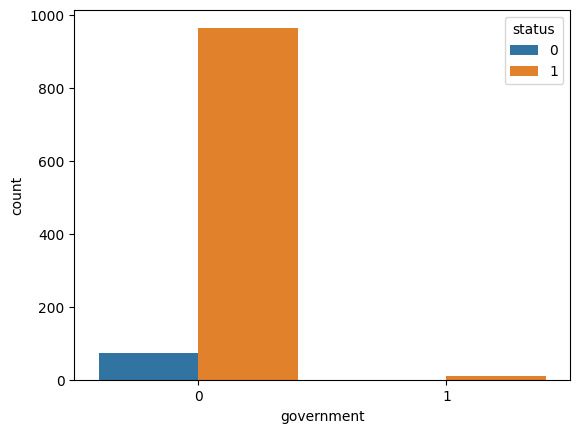

In [ ]:
# Какие предприятия чаще оказываются ненадежными? Результат: негосударственные компании
sns.countplot(x = 'government', hue = 'status', data = df)

In [ ]:
# Отбор признаков для ML
df.drop(['Name', 'INN', 'global_id'], axis = 1, inplace = True)
df.head(3)

,status,Contract,completed,notСompleted,SubjectOfSmallBusiness,government
0,1,55,55,0,1,0
1,0,7,3,4,0,0
2,0,5,2,3,1,0


In [ ]:
# выделение целевой переменной
X_df = df.drop('status', axis = 1)
y_df = df['status']

In [ ]:
X_df.head(3)

,Contract,completed,notСompleted,SubjectOfSmallBusiness,government
0,55,55,0,1,0
1,7,3,4,0,0
2,5,2,3,1,0


In [ ]:
# обучение модели
model = LogisticRegression()
model.fit(X_df, y_df)

LogisticRegression()

In [ ]:
# прогноз на обучающей выборке
y_pred_df = model.predict(X_df)

In [ ]:
# сравнение прогнозных значений с фактическими
conf_matrix = confusion_matrix(y_df, y_pred_df)
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз ненадежный ', 'Прогноз надежный'], index = ['Факт ненадежный', 'Факт надежный'])
conf_matrix_labels

,Прогноз ненадежный,Прогноз надежный
Факт ненадежный,74,0
Факт надежный,4,972


In [ ]:
# % прогноза
model_accuracy = accuracy_score(y_df, y_pred_df)
round(model_accuracy, 3)

0.996